In [1]:
%load_ext autoreload
%autoreload
from tracking import visualise_tracks, track, discard_masks,consolidate_indices
from utils import verify_ID_uniqueness, visualise_image
from make_gaussians import add_centroids,make_gaussian_masks, visualise_gaussians
from make_dataset import make_dataset
from resize_data import resize_data, scale_data
import h5py
import os
ROOT_DIR = os.path.abspath("../")
import numpy as np


In [2]:
# Path to the processed and raw folders in the data
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
RAW_PATH = os.path.join(ROOT_DIR, "../data/raw/")

data_file = os.path.join(PROCESSED_PATH, "30SLight1_Test2/30SLight1_Test2.hdf5")
resized_file = os.path.join(PROCESSED_PATH, "30SLight1_Test2/30SLight1_Test2_resized.hdf5")
target_file = os.path.join(PROCESSED_PATH, "30SLight1_Test2/30SLight1_Test2_Fewer_Masks.hdf5")
consolidated_file =  os.path.join(PROCESSED_PATH, "30SLight1_Test2/30SLight1_Test2_Fewer_Masks_Consolidated.hdf5")
dataset_file = os.path.join(PROCESSED_PATH, "30SLight1_Test2/30SLight1_Test2_dataset.hdf5")
target_folder = os.path.join(PROCESSED_PATH, "30SLight1_Test2/tracked_images/")
target_folder_consolidated = os.path.join(PROCESSED_PATH, "30SLight1_Test2/tracked_images_consolidated/")
target_folder_gauss = os.path.join(PROCESSED_PATH, "30SLight1_Test2/tracked_images_gauss/")


In [3]:
discard_masks(data_file,target_file, small_threshold = 20)

In [4]:
track(target_file)

In [5]:
track(target_file, reverse=True)

In [6]:
consolidate_indices(target_file)

In [7]:
resize_data(target_file, resized_file,256,314)

In [8]:
make_gaussian_masks(resized_file, verbose=0)

In [9]:
visualise_gaussians(resized_file,target_folder_gauss,captions = False)


*** No instances to display *** 



In [10]:
visualise_tracks(resized_file, target_folder_consolidated, id_idx = 0)


*** No instances to display *** 



In [11]:
make_dataset(resized_file, dataset_file)

In [23]:
f = h5py.File(dataset_file, "r")

In [13]:
len(list(f.keys()))

207

In [14]:
list(f['datapoint0'].keys())

['delta_masks',
 'future_mask',
 'gaussian_mask',
 'images',
 'mask_id',
 'masks',
 'origin_frame']

In [15]:
f['datapoint0']['delta_masks'].shape

(182, 314, 3)

In [16]:
f['datapoint0']['future_mask'].shape

(182, 314)

In [17]:
f['datapoint0']['gaussian_mask'].shape

(182, 314)

In [18]:
f['datapoint0']['images'].shape

(182, 314, 3, 3)

In [19]:
f['datapoint0']['mask_id'].value

array([ 1.], dtype=float32)

In [20]:
f['datapoint0']['origin_frame'].shape

(1,)

In [24]:
f['datapoint0']['masks'].shape

(182, 314, 3)

In [25]:
f.close()

In [68]:
f2 = h5py.File(resized_file, "r")

In [70]:
f2['frame1']['masks'].shape


(104, 180, 12)

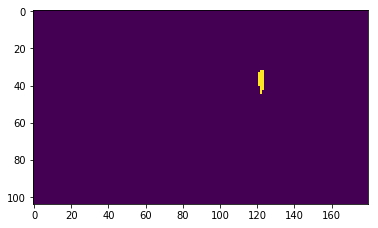

In [63]:
f.close()

In [64]:
f2.close()